# 1. Functions

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import torch
npx.set_np()

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

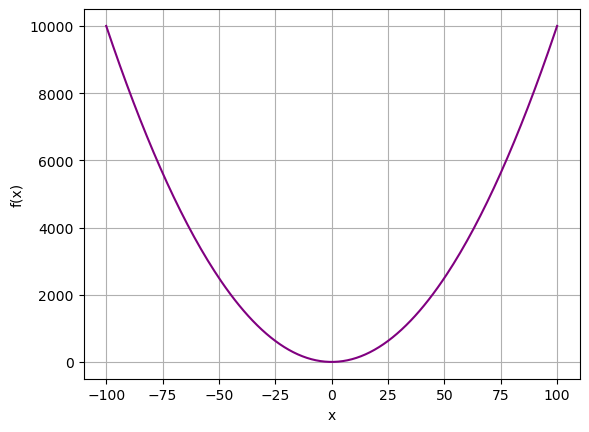

In [2]:


def f(x):
    return x**2 + 2

# Create an array of x values from -100 to 100
x = np.array(range(-100, 101))

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot x against f(x)
plt.plot(x,f(x), color='purple')

plt.show()

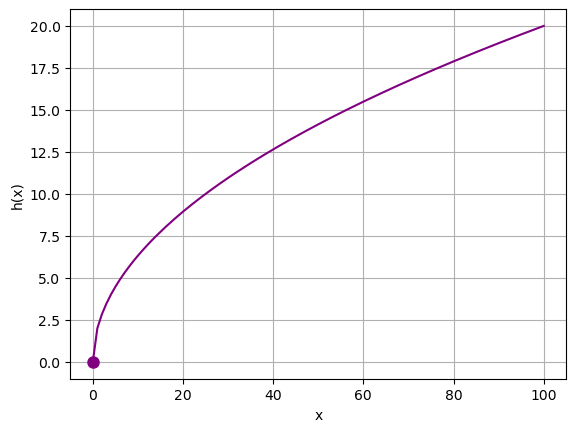

In [3]:
def h(x):
    if x >= 0:
        return 2 * np.sqrt(x)

# Create an array of x values from -100 to 100
x = range(-100, 101)

# Get the corresponding y values from the function
y = [h(a) for a in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('h(x)')
plt.grid()

# Plot x against h(x)
plt.plot(x,y, color='purple')

# plot a filled circle at the end to indicate a closed interval
plt.plot(0, h(0), color='purple', marker='o', markerfacecolor='purple', markersize=8)

plt.show()

# 2. Rate of Change

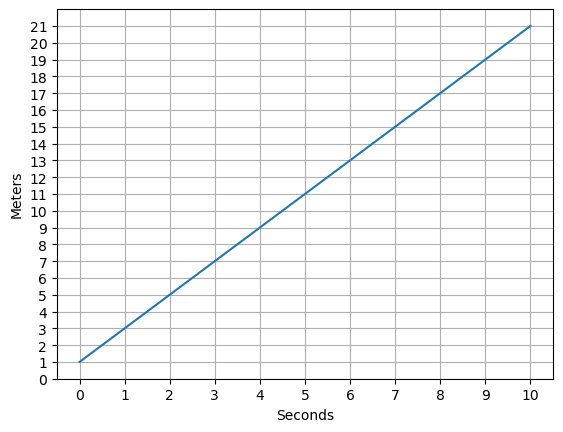

In [4]:
def q(x):
    return 2*x + 1
x = np.array(range(0, 11))
plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.xticks(range(0,11))
plt.yticks(range(0, 22))
plt.grid()
plt.plot(x,q(x))
plt.show()

### What is speed?

__How much meters we travelled within a unit of second?__


\begin{equation}m = \frac{\Delta{y}}{\Delta{x}} = \frac{q(x)_{2} - q(x)_{1}}{x_{2} - x_{1}} \end{equation}

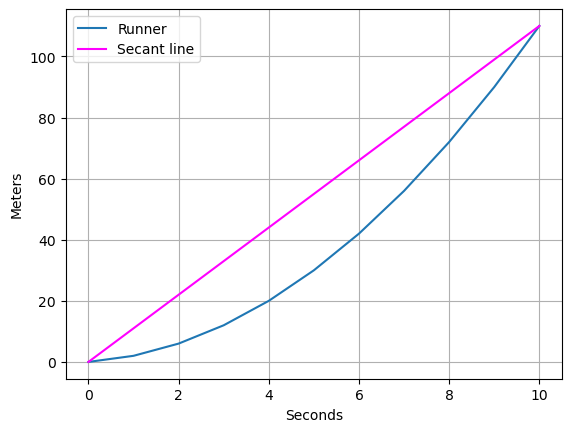

In [5]:
## Another Example
def q(x):
    return x**2 + x
plt.plot(x,q(x),label='Runner')

# Secant line is a line drawn between two points on the graph
s = np.array([0,10])
plt.plot(s,q(s), color='magenta',label='Secant line')

plt.xlabel('Seconds')
plt.ylabel('Meters')
plt.grid()
plt.legend()
plt.show()


- At 0 seconds, ***x*** is 0 and ***r***(0) = **0**.
- At 10 seconds, ***x*** is 10 and ***r***(10) = 110.

So we can meassure the rate of change like this:

\begin{equation}m = \frac{110 - 0}{10 - 0}=\frac{11}{1} \end{equation}


So our rate of change is <sup>11</sup>/<sub>1</sub> or put another way, the cyclist is travelling at an average velocity of 11 meters-per-second over the 10-second period.

Of course, we can measure the average velocity between any two points on the exponential line. Use the following Python code to show the secant line for the period between 2 and 7 seconds, and calculate the average velocity for that period

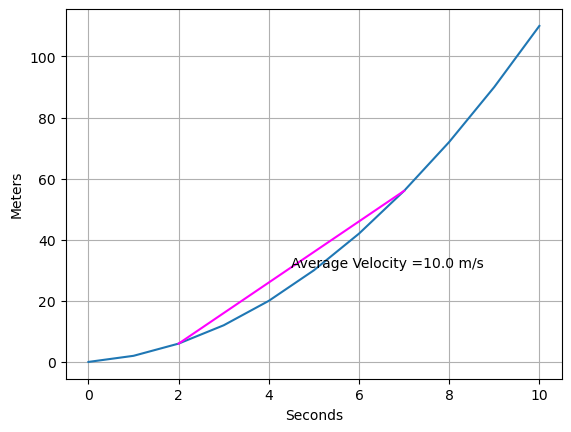

In [6]:
# Create an array for the secant line
s = np.array([2,7])

# Calculate rate of change
x1 = s[0]
x2 = s[-1]
y1 = q(x1)
y2 = q(x2)
a = (y2 - y1)/(x2 - x1)


# Set up the graph
plt.xlabel('Seconds')
plt.ylabel('Meters')

plt.plot(x,q(x),label='Runner')

plt.plot(s,q(s), color='magenta',label='Secant line')

plt.annotate('Average Velocity =' + str(a) + ' m/s',((x2+x1)/2, (y2+y1)/2))

plt.grid()
plt.show()



# 3. Derivatives

Let $f$ be a function of $f:\mathbb{R}^n \mapsto \mathbb{R}^m$. The derivative/slope of $f$ on $x$ corresponds the rate of change of $f$ with respect to $x$ and defined as :

$$ \frac{d f(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$


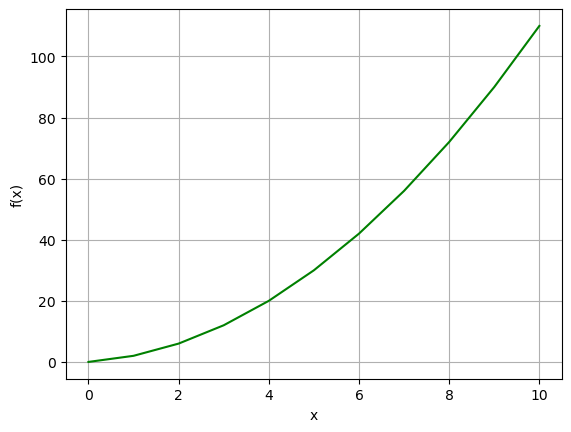

In [7]:

def f(x):
    return x**2 + x

x = list(range(0, 11))

y = [f(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

plt.show()


We can calculate the average of change between x=4 and x=6 by dividing the change (or *delta*, indicated as &Delta;) in the value of *f(x)* by the change in the value of *x*:

\begin{equation}m = \frac{\Delta{f(x)}}{\Delta{x}} \end{equation}

The delta for *f(x)* is calculated by subtracting the *f(x)* values of our points, and the delta for *x* is calculated by subtracting the *x* values of our points; like this:

\begin{equation}m = \frac{f(x)_{2} - f(x)_{1}}{x_{2} - x_{1}} \end{equation}


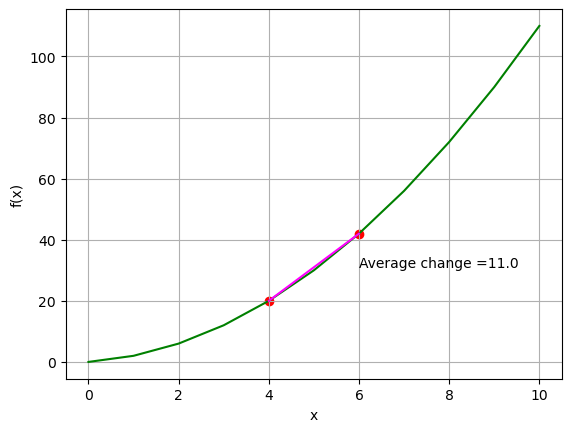

In [8]:
# Set the a values
x1 = 4
x2 = 6

# Get the corresponding f(x) values 
y1 = f(x1)
y2 = f(x2)

# Calculate the slope by dividing the deltas
a = (y2 - y1)/(x2 - x1)

# Create an array of x values for the secant line
sx = [x1,x2]

# Use the function to get the y values
sy = [f(i) for i in sx]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the interval points
plt.scatter([x1,x2],[y1,y2], c='red')

# Plot the secant line
plt.plot(sx,sy, color='magenta')

# Display the calculated average rate of change
plt.annotate('Average change =' + str(a),(x2, (y2+y1)/2))

plt.show()

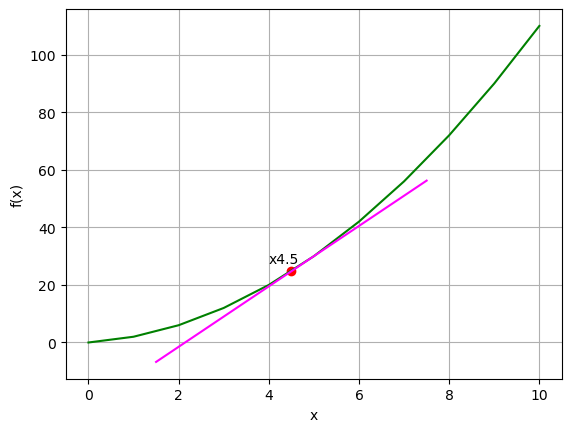

In [9]:
def f(x):
    return x**2 + x

x = list(range(0, 11))
# Use the function to get the y values
y = [f(i) for i in x]

# Set the x1 point, arbitrarily 5
x1 = 4.5
y1 = f(x1)

# Set the x2 point, very close to x1
x2 = 5.000000001
y2 = f(x2)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('x' + str(x1),(x1,y1), xytext=(x1-0.5, y1+3))

# Approximate the tangent slope and plot it
m = (y2-y1)/(x2-x1)
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)

plt.plot([xMin,xMax],[yMin,yMax], color='magenta')
plt.show()

## 3.1 Finding the Derivative for a Specific Point

\begin{equation}f(x) = x^{2} + x\end{equation}

Let's say we want to find ***f'(2)*** (the derivative for ***f*** when ***x*** is 2).

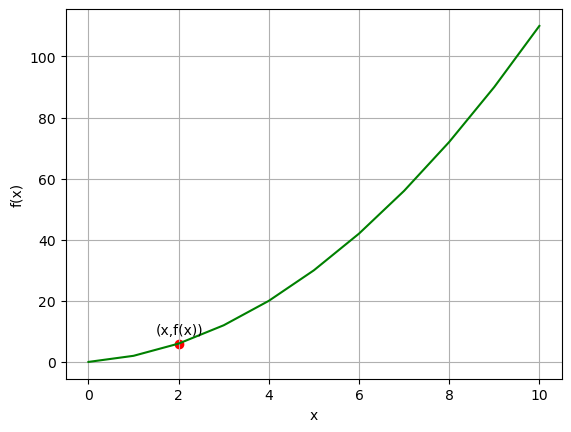

In [10]:
# Set the point
x1 = 2
y1 = f(x1)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')
# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))
plt.show()

Here's our generalized formula for finding a derivative at a specific point (*a*):

\begin{equation}f'(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h} \end{equation}

So let's just start by plugging our *a* value in:

\begin{equation}f'(\textbf{2}) = \lim_{h \to 0} \frac{f(\textbf{2} + h) - f(\textbf{2})}{h} \end{equation}

We know that ***f(x)*** encapsulates the equation ***x<sup>2</sup> + x***, so we can rewrite our derivative equation as:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{((2+h)^{2} + 2 + h) - (2^{2} + 2)}{h} \end{equation}

We can apply the distribution property to ***(2 + h)<sup>2</sup>*** using the rule that *(a + b)<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup> + 2ab*:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - (2^{2} + 2)}{h} \end{equation}

Then we can simplify 2<sup>2</sup> + 2 (2<sup>2</sup> is 4, plus 2 gives is 6):

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - 6}{h} \end{equation}

We can combine like terms on the left side of the numerator to make things a little clearer:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(h^{2} + 5h + 6) - 6}{h} \end{equation}

Which combines even further to get rid of the *6*:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{h^{2} + 5h}{h} \end{equation}

And finally, we can simplify the fraction:

\begin{equation}f'(2) = \lim_{h \to 0} h + 5 \end{equation}

To get the limit when *h* is approaching 0, we can use direct substitution for h:

\begin{equation}f'(2) = 0 + 5 \end{equation}

so:

\begin{equation}f'(2) = 5 \end{equation}

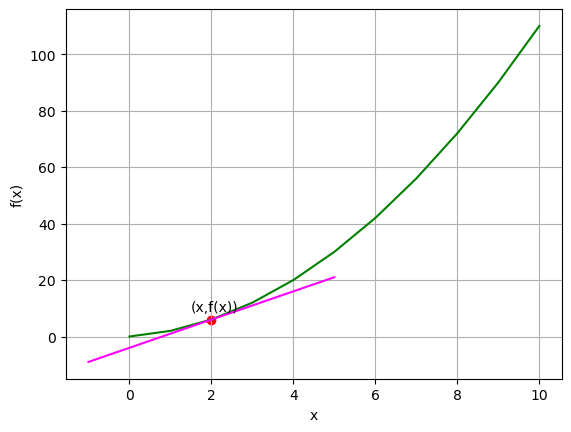

In [11]:

def f(x):
    return x**2 + x
# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the point
x1 = 2
y1 = f(x1)

# Specify the derivative we calculated above
m = 5

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the tangent line using the derivative we calculated
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

## 3.2. Finding a Derivative for Any Point
Now let's put it all together and define a function that we can use to find the derivative for any point in the ***f*** function:

Here's our general derivative function again:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

We know that ***f(x)*** encapsulates the equation ***x<sup>2</sup> + x***, so we can rewrite our derivative equation as:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{((x+h)^{2} + x + h) - (x^{2} + x)}{h} \end{equation}

We can apply the distribution property to ***(x + h)<sup>2</sup>*** using the rule that *(a + b)<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup> + 2ab*:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{(x^{2} + h^{2} + 2xh + x + h) - (x^{2} + x)}{h} \end{equation}

Then we can use the distributive property to expand ***- (x<sup>2</sup> + x)***, which is the same thing as *-1(x<sup>2</sup> + x)*, to ***- x<sup>2</sup> - x***:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{x^{2} + h^{2} + 2xh + x + h - x^{2} - x}{h} \end{equation}

We can combine like terms on the numerator to make things a little clearer:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{h^{2} + 2xh + h}{h} \end{equation}

And finally, we can simplify the fraction:

\begin{equation}f'(x) = \lim_{h \to 0} 2x + h + 1 \end{equation}

To get the limit when *h* is approaching 0, we can use direct substitution for h:

\begin{equation}f'(x) = 2x + 0 + 1 \end{equation}

so:

\begin{equation}f'(x) = 2x + 1 \end{equation}

Now we have a function for the derivative of ***f***, which we can apply to any *x* value to find the slope of the function at ***f(x***).

For example, let's find the derivative of ***f*** with an *x* value of 5:

\begin{equation}f'(5) = 2\cdot5 + 1 = 10 + 1 = 11\end{equation}


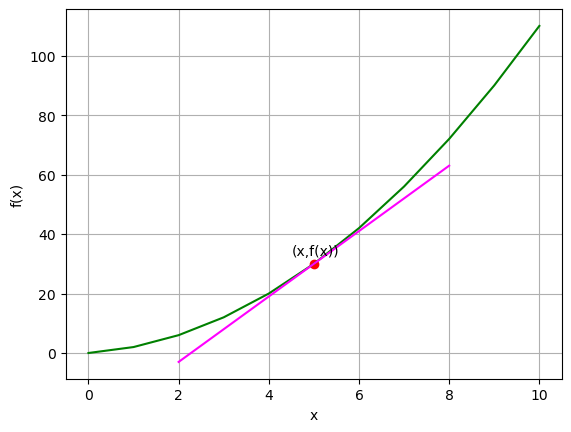

In [12]:
# Create derivative function for f
def fd(x):
    return (2 * x) + 1

# Set the point
x1 = 5
y1 = f(x1)

# Calculate the derivative using the derivative function
m = fd(x1)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the tangent line using the derivative we calculated
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

## 4. Partial Derivatives

We've considered derivatives of functions that operate on a single variable. How do we take the derivatives of a function like the following?

$$f(x,y) = x^2 + y^2$$

We can take a derivative of the changes in the function with respect to either x or y. We call these derivatives with respect to one variable partial derivatives. Let's give this a try by taking the derivative of $f(x,y)$ with respect to ***x***. We write this partial derivative as follows.

$$\frac{\partial f(x,y)}{\partial x} = \frac{\partial (x^2 + y^2)}{\partial x}$$

Just as ordinary derivatives give us a way to compute the rate of change of a function, partial derivatives give us a way to compute the rate of change of a function of many variables with respect to one of those variables.

Since $f(x,y)$ is the sum of several simpler functions we need to take the partial derivative of each of these and sum the result. The first two parts are easy.

$$\frac{\partial x^2}{\partial x} = 2x$$

Notice that we are following the usual rules of differentiation for any function of ***x*** here. 

Now we need to take the partial derivative of the last part of $f(x,y)$, which does not depend on ***x*** at all. In these care we get the following.

$$\frac{\partial y^2}{\partial x} = 0$$

Now we can add up the parts to get the complete partail derivative of $f(x,y)$.

$$\frac{\partial f(x,y)}{\partial x} = 2x + 0 = 2x$$
We can also take the partial derivative of $f(x,y)$ with respect to ***y***. The process proceeds in the following manner.

$$\frac{\partial f(x,y)}{\partial y} = 0 + 2y = 2y$$
## 4.1 Computing a Gradient

At this point, you may well ask what is the point of computing partial derivatives? Yes, they are a nifty math trick, but what are they good for? It turns out that partial derivatives are important if you want to find the analog of the slope for multi-dimensonal surfaces. We call this quantity the **gradient**. 

Recall that you can find minimum and maximum of curves using derivatives. In the same way, you can find the minimum and maximum of surfaces by following the gradiennt and finding the points were the gradient is zero in all directions. 
You have already examined the partial derivatives of the function, $f(x,y) = x^2 + y^2$. These partial derivatives are:

$$\frac{\partial f(x,y)}{\partial x} = 2x \\
\frac{\partial f(x,y)}{\partial y} = 2y$$

In this case, the gradient is a 2-dimensional vector of the change of the function in the $x$ direction and the change in the function in the $y$ direction. This vector can be written as follows:

$$grad(f(x,y)) =  \vec{g(x,y)} = \begin{bmatrix}\frac{\partial f(x,y)}{\partial x} \\ \frac{\partial f(x,y)}{\partial y} \end{bmatrix} = \begin{bmatrix}2x \\ 2y \end{bmatrix} $$


## Plotting the Gradient

A plot will help you get feel for the meaning of the gradient. The code below plots the gradient of the function $f(x,y) = x^2 + y^2$ along with contours of the value of the function. Run this code and examine the plot.  

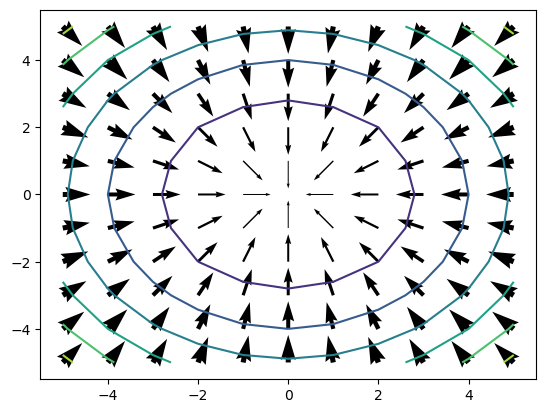

In [13]:

## Create a uniform grid
el = np.arange(-5,6)
nx, ny = np.meshgrid(el, el, sparse=False, indexing='ij')

## flatten the gird to 1-d and compute the value of the function z
x_coord = []
y_coord = []
z = []
for i in range(11):  
    for j in range(11):
        x_coord.append(float(-nx[i,j]))
        y_coord.append(float(-ny[i,j]))       
        z.append(nx[i,j]**2 + ny[i,j]**2)

## perform vector arithmetic to get the x and y gradients        
x_grad = [-2 * x for x in x_coord]
y_grad = [-2 * y for y in y_coord] 

## Plot the arrows using  width for gradient
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
for x, y, xg, yg in zip(list(x_coord), list(y_coord), list(x_grad), list(y_grad)):
    if x != 0.0 or y != 0.0: ## Avoid the zero divide when scaling the arrow
        l = math.sqrt(xg**2 + yg**2)/2.0
        plt.quiver(x, y, xg, yg, width = l, units = 'dots')

## Plot the countours of the function surface
z = np.array(z).reshape(11,11)    
plt.contour(el, el, z)    

# 5. Gradients, Jacobians


## 5.1. Scalar valued functions
Let $f$ be a scalar valued function and defined as
(say $f:\mathbb{R}^1 \mapsto \mathbb{R}^1$). The derivative of $f$ is computed as 

$$ \frac{\partial f(x)}{\partial x} = lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$


Let $f$ be a scalar valued function and defined as
(say $f:\mathbb{R}^m \mapsto \mathbb{R}^1$). The derivative of $f$ is a vector of partial derivatives. Similarly,
$\frac{\partial f(x)}{\partial x_i}$ reveals us how much $f(x)$ increases if $x_i$ increases. Strictly speaking, **gradients** are only defined for scalar functions. For vector valued functions we are dealing with vector of partial derivatives.


In [14]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def dsigmoid(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def relu(x):
    return np.maximum(0, x)

def drelu(x):
    dr=np.ones((x.shape))
    dr[x <= 0] = 0
    return dr

In [15]:
x=np.array([-1.3, 0.5, 2.1])
print('X:\n{0}'.format(x))
print('### Sigmoid ###')
sx=sigmoid(x)
print('S:\n{0}'.format(sx))
print('dS/X:\n',dsigmoid(x))

print('### RELU ###')
rx=relu(x)
print('R:\n{0}'.format(rx))
print('dR/X:\n',drelu(x))

X:
[-1.3  0.5  2.1]
### Sigmoid ###
S:
[0.21416503 0.62245935 0.8909032 ]
dS/X:
 [0.16829836 0.23500371 0.09719471]
### RELU ###
R:
[0.  0.5 2.1]
dR/X:
 [0. 1. 1.]


In [16]:
def softmax_func(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z), axis=0)).T
    return sm
def softmax_grad(s):
    jacobian_m = np.diag(s)
    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            if i == j:
                jacobian_m[i][j] = s[i] * (1 - s[i])
            else:
                jacobian_m[i][j] = -s[i] * s[j]
    return jacobian_m

def softmax_grad_vec(softmax):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax.reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)


In [17]:
x=np.array([-1.3, 0.5, 2.1])
sx=softmax_func(x)
print('X:\n{0} \t \nS:\n{1}'.format(x,sx))
print('J:\n',softmax_grad(sx))

X:
[-3.3999999 -1.5999999  0.       ] 	 
S:
[0.02701699 0.16344327 0.80953974]
J:
 [[ 0.02628707 -0.00441575 -0.02187133]
 [-0.00441575  0.13672957 -0.13231382]
 [-0.02187133 -0.13231382  0.15418515]]



#### RELU

$$ \operatorname{ReLU}(x) = \max(x, 0)$$


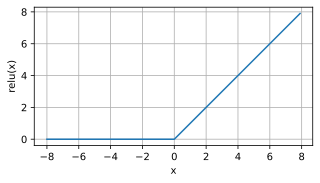

In [18]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(5, 2.5))

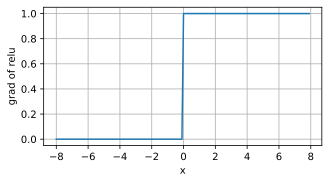

In [19]:
y.backward(torch.ones_like(x), retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### Sigmoid

$$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$ 

$$ \frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

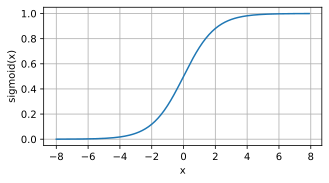

In [20]:
y = torch.sigmoid(x)
d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

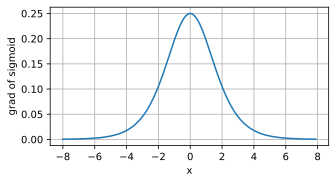

In [21]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

#### Tanh

$$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$
$$ \frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$


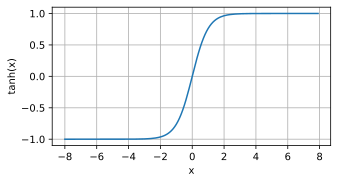

In [22]:
y = torch.tanh(x)
d2l.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5))

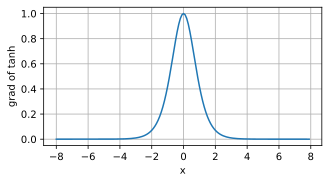

In [23]:
# Clear out previous gradients.
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

Input shape:(160,)


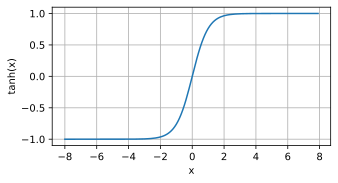

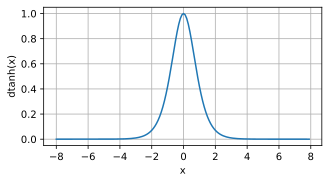

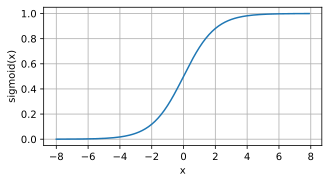

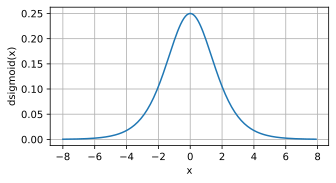

In [24]:


key = random.PRNGKey(0)
def plot1d(x,y,x_label,y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x,y)
    plt.grid()
    plt.show()
x=jnp.arange(-8.0, 8.0, 0.1)
print(f'Input shape:{x.shape}')
dtanh = vmap(grad(jnp.tanh))
plot1d(x,jnp.tanh(x),'x','tanh(x)')
plot1d(x,dtanh(x),'x','dtanh(x)')


def sigmoid(x):
    return 0.5 * (jnp.tanh(x / 2) + 1)
ds = vmap(grad(sigmoid))
x=jnp.arange(-8.0, 8.0, 0.1)
plot1d(x,sigmoid(x),'x','sigmoid(x)')
plot1d(x,ds(x),'x','dsigmoid(x)')

## 5.2 Vector  valued functions
Let $f$ be a vector valued function (say $f:\mathbb{R}^n \mapsto \mathbb{R}^m$).

$$ f(\vec{x}):\begin{bmatrix}
\vec{x}_1\\
\vec{x}_2\\
\cdots\\
\vec{x}_n
\end{bmatrix}
\rightarrow
\begin{bmatrix}
\vec{y}_1\\
\vec{y}_2\\
\cdots\\
\vec{y}_m
\end{bmatrix}$$


Then the gradient of $\vec{y}=f(\vec{x})$ with respect to $\vec{x}$ is a Jacobian matrix:

$$ \begin{align}J=\left(\begin{array}{ccc}
   \frac{\partial y_{1}}{\partial x_{1}} & \cdots & \frac{\partial y_{1}}{\partial x_{n}}\\
   \vdots & \ddots & \vdots\\
   \frac{\partial y_{m}}{\partial x_{1}} & \cdots & \frac{\partial y_{m}}{\partial x_{n}}
   \end{array}\right)\end{align} $$
   



In [25]:
from jax import jacfwd

W = random.normal(key, (3,))

f = lambda W: W # identity function
print(f'Input:{W}\t Inputs shape: Input:{W.shape}')
print(f'Output:{f(W)}\t Outputs shape:{f(W).shape}')

Input:[ 1.8160858  -0.48262328  0.339889  ]	 Inputs shape: Input:(3,)
Output:[ 1.8160858  -0.48262328  0.339889  ]	 Outputs shape:(3,)


# Pause for a second

* What is the relationship between i.th input ($W_i$) with j.th output $f(W)_j$ given that $i\not=j$ ?
* What is the relationship between i.th input ($W_i$) with j.th output $f(W)_j$ given that $i=j$ ?



In [26]:
Jacobian = jacfwd(f)(W)
print("jacfwd result, with shape", Jacobian.shape)
print(Jacobian)


jacfwd result, with shape (3, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### => There is no relationship between $i.$th input and $j.$th output given $i\not=j$, isn't? :)


# Partial deritivates of softmax


In [27]:
softmax = lambda W: jax.nn.softmax(W) 
print(f'Input:{W}\t Inputs shape: Input:{W.shape}')
print(f'Output:{softmax(W)}\t Outputs shape:{softmax(W).shape}\n')

jacfwd(softmax)(W)

Input:[ 1.8160858  -0.48262328  0.339889  ]	 Inputs shape: Input:(3,)
Output:[0.7525058  0.07554282 0.1719514 ]	 Outputs shape:(3,)



DeviceArray([[ 0.18624079, -0.05684641, -0.12939443],
             [-0.05684641,  0.06983609, -0.01298969],
             [-0.12939443, -0.01298969,  0.14238411]], dtype=float32)

# Jacobian matrix of softmax

1. Only the diagonal values are **positives**.
2. All other values are **negative**.